In [3]:
#load libraries
import numpy as np
import math
from math import sqrt
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean
from scipy.stats import norm, lognorm
import seaborn as sns
sns.set()
sns.set_style('white')
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance, Voronoi, voronoi_plot_2d, ConvexHull, Delaunay
from collections import defaultdict
import itertools
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import random
import sys
from itertools import combinations 
import time
from scipy import stats
from sklearn.svm import SVC # "Support vector classifier"
import sobol_seq

#load data
raw_data = np.loadtxt('Data Files/EBSD Raw Data/AZ31B Ecomp 10e0 Int_3 raw1.txt', skiprows=17, usecols=(0,1,2,3,4,8))
raw_data_copy=np.copy(raw_data)

def js_divergence_scipy(hist1,hist2):
    #square distance to find divergence, use log2
    return (distance.jensenshannon(hist1, hist2, base=2))**2

In [4]:
def nearest_neighbors(values, all_values, nbr_neighbors=1):
    nn = NearestNeighbors(nbr_neighbors, metric='euclidean', algorithm='kd_tree').fit(all_values)
    dists, idxs = nn.kneighbors(values)
    return idxs

In [5]:
# 1D Golden Ratio: https://blog.demofox.org/2017/05/29/when-random-numbers-are-too-random-low-discrepancy-sequences/

In [6]:
def quasi_random(size,start=0):
    qr_samples=[]
    #starting value
    qr_samples.append(start)
    #golden ratio
    gr = 1.618

    while len(qr_samples) < size:
        qr_samples.append((qr_samples[-1] + gr) % 1)

    return np.array(qr_samples)

In [7]:
# a=quasi_random(87017)
# print(len(a))
# print(len(np.unique(a)))

# c=a[np.where(a<0.001)]
# print(c)
# #Values are clumped, not randomly distributed!

# 87017*0.001

# plt.xlim(0,1e-12)
# plt.scatter(a, np.zeros(len(a)))

# qr_indexes = (np.around((87017 * quasi_random(300)),decimals=0)).astype(int)
# plt.xlim(0,1000)
# plt.scatter(qr_indexes, np.zeros(len(qr_indexes)))
# qr_raw_data = raw_data[qr_indexes]

# print(len(np.unique(qr_raw_data[:,5])))

In [8]:
coords=raw_data[:,3:5]

In [9]:
# 2D Sobol

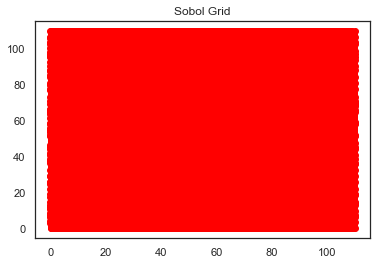

In [10]:
N=87017
sobol = 110*(sobol_seq.i4_sobol_generate(2, N))

# print(np.amin(sobol[:,0]))
# print(np.amax(sobol[:,0]))
# print(np.amin(sobol[:,1]))
# print(np.amax(sobol[:,1]))

plt.title("Sobol Grid")
plt.scatter(sobol[:,0], sobol[:,1], marker="o", alpha=1, color='red');

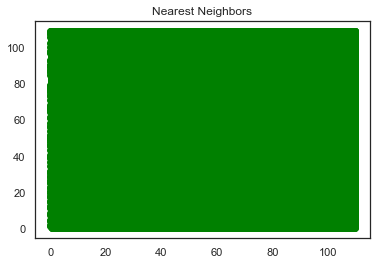

In [11]:
sobol_sample=raw_data[nearest_neighbors(sobol,coords),3:5]
sobol_sample=sobol_sample[:,0]
plt.title("Nearest Neighbors")
plt.scatter(sobol_sample[:,0], sobol_sample[:,1], marker="o", alpha=1, color='green');

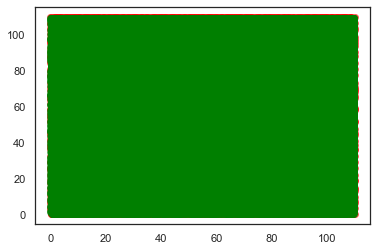

In [12]:
plt.scatter(sobol[:,0], sobol[:,1], marker="o", alpha=0.5, color='red')
plt.scatter(sobol_sample[:,0], sobol_sample[:,1], marker="o", alpha=0.5, color='green')

In [13]:
#2D Golden Ratio: http://extremelearning.com.au/unreasonable-effectiveness-of-quasirandom-sequences/

In [14]:
# Pseudocode
# g = 1.32471795724474602596
# a1 = 1.0/g
# a2 = 1.0/(g*g)
# x[n] = (0.5+a1*n) %1
# y[n] = (0.5+a2*n) %1

In [15]:
# Template Code. 
# phi(1) = 1.6180339887498948482 
# phi(2) = 1.32471795724474602596 

def phi(d): 
    x=2.0000 
    for i in range(10): 
        x = pow(1+x,1/(d+1)) 
    return x

# Number of dimensions. 
# d=2 

# # number of required points 
# n=50

In [16]:
def golden(n,d=2):
    g = 1.32471795724474602596 
    
    alpha = np.zeros(d) 
    for j in range(d): 
        alpha[j] = pow(1/g,j+1) %1 
    
    z = np.zeros((n, d)) 
    seed=0
    for i in range(n): 
        z[i] = (seed + alpha*(i+1)) %1 
    
    return z

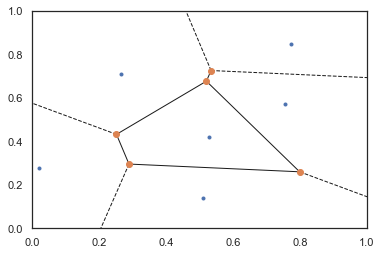

In [25]:
#at 12, 49, 151, 616, 1897, 7739, 23833 it forms percent hexagons (like grid)
golden_2D = golden(6)

vor = Voronoi(golden_2D)
fig = voronoi_plot_2d(vor)
plt.xlim(0,1)
plt.ylim(0,1)
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()

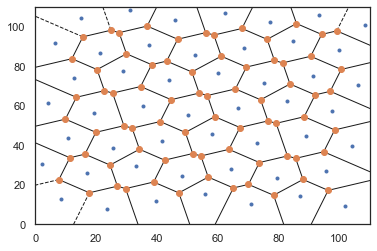

In [22]:
#at 12, 49, 151, 616, 1897, 7739, 23833 it forms percent hexagons (like grid)
golden_2D[:,0]*=np.amax(raw_data[:,3])
golden_2D[:,1]*=np.amax(raw_data[:,4])


vor = Voronoi(golden_2D)
fig = voronoi_plot_2d(vor)
plt.xlim(0,110)
plt.ylim(0,110)
plt.show()

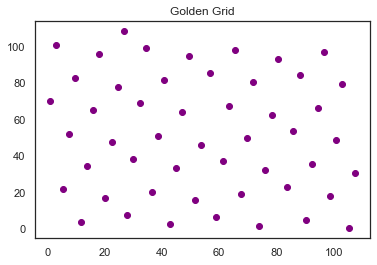

In [165]:
plt.title("Golden Grid")
plt.scatter(golden_2D[:,0], golden_2D[:,1], marker="o", alpha=1, color='Purple');

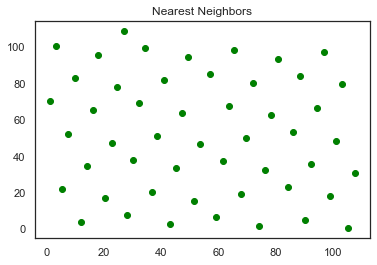

In [166]:
golden_sample=raw_data[nearest_neighbors(golden_2D,coords),3:5]
golden_sample=golden_sample[:,0]
plt.title("Nearest Neighbors")
plt.scatter(golden_sample[:,0], golden_sample[:,1], marker="o", alpha=1, color='green');

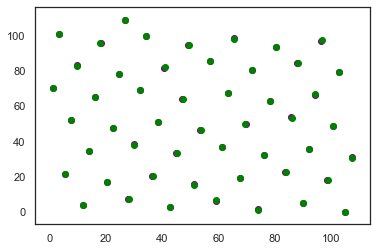

In [167]:
plt.scatter(golden_2D[:,0], golden_2D[:,1], marker="o", alpha=1, color='Purple');
plt.scatter(golden_sample[:,0], golden_sample[:,1], marker="o", alpha=1, color='green');

In [29]:
# Improved Grid Sampling

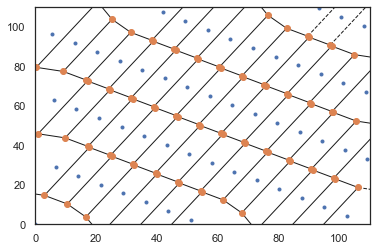

In [28]:
# Very High Discrepency
grid_coords=raw_data[::1775,3:5]
vor = Voronoi(grid_coords)
fig = voronoi_plot_2d(vor)
plt.xlim(0,110)
plt.ylim(0,110)
plt.show()

In [ ]:
# Square Grid

In [41]:
res = 7
x = np.linspace(np.amin(raw_data[:,3]), np.amax(raw_data[:,3]), res)
y = np.linspace(np.amin(raw_data[:,4]), np.amax(raw_data[:,4]), res)
xv, yv = np.meshgrid(x, y)
meshgrid_coords=np.concatenate((xv.reshape(-1,1), yv.reshape(-1,1)), axis=1)
print(len(meshgrid_coords))

49


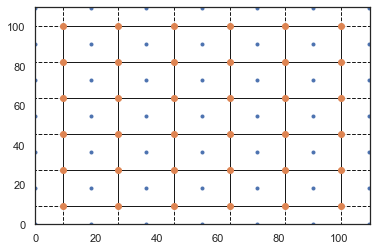

In [42]:
vor = Voronoi(meshgrid_coords)
fig = voronoi_plot_2d(vor)
plt.xlim(0,110)
plt.ylim(0,110)
plt.show()

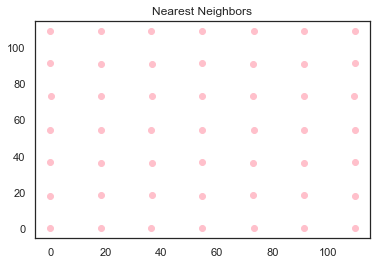

In [129]:
grid_sample=raw_data[nearest_neighbors(meshgrid_coords,coords),3:6]
grid_sample=grid_sample[:,0]
plt.title("Nearest Neighbors")
plt.scatter(grid_sample[:,0], grid_sample[:,1], marker="o", alpha=1, color='pink');

In [130]:
grid_sample[:,2]

array([1.000e+00, 7.000e+00, 1.400e+01, 1.900e+01, 2.600e+01, 3.300e+01,
       4.100e+01, 1.340e+02, 1.900e+02, 2.070e+02, 1.970e+02, 2.360e+02,
       2.100e+02, 2.140e+02, 4.300e+02, 4.210e+02, 3.720e+02, 3.800e+02,
       4.060e+02, 3.900e+02, 4.000e+02, 6.440e+02, 6.020e+02, 6.230e+02,
       6.330e+02, 6.000e+02, 6.430e+02, 6.110e+02, 8.100e+02, 7.950e+02,
       5.770e+02, 8.260e+02, 8.080e+02, 6.840e+02, 7.800e+02, 9.660e+02,
       9.640e+02, 9.680e+02, 9.310e+02, 8.870e+02, 9.550e+02, 9.610e+02,
       1.097e+03, 1.082e+03, 1.094e+03, 1.089e+03, 1.106e+03, 1.064e+03,
       1.112e+03])

In [47]:
# New Square Grid

In [110]:
phi = (np.sqrt(5)+1)/2
fig_width = 21
ratio = np.sqrt(3)/2 # cos(60°)

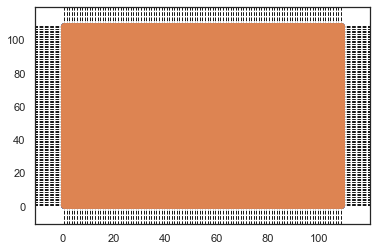

In [127]:
#edge lengths need rescaling
N = 87017
N_X = int(np.sqrt(N))
N_Y = N // N_X
xv, yv = np.meshgrid(np.arange(N_X), np.arange(N_Y), sparse=False, indexing='xy')
square_coords=np.concatenate((xv.reshape(-1,1), yv.reshape(-1,1)), axis=1)
square_coords[:,0] = square_coords[:,0] * (np.amax(raw_data[:,3]) / np.amax(square_coords[:,0]))
square_coords[:,1] = square_coords[:,1] * (np.amax(raw_data[:,4]) / np.amax(square_coords[:,1]))
# print(np.amin(square_coords[:,0]))
# print(np.amin(square_coords[:,1]))
# print(np.amax(square_coords[:,0]))
# print(np.amax(square_coords[:,1]))
vor = Voronoi(square_coords)
fig = voronoi_plot_2d(vor)

In [115]:
# Hexagonal Grid

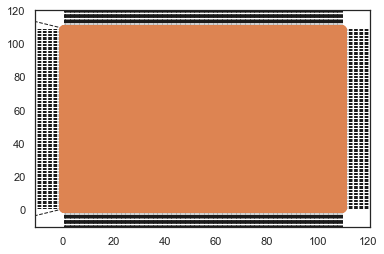

In [125]:
N_X = int(np.sqrt(N)/ratio)
N_Y = N // N_X
xv, yv = np.meshgrid(np.arange(N_X), np.arange(N_Y), sparse=False, indexing='xy')
xv = xv * ratio
xv[::2, :] += ratio/2
hex_coords=np.concatenate((xv.reshape(-1,1), yv.reshape(-1,1)), axis=1)
hex_coords[:,0] *= (np.amax(raw_data[:,3]) / np.amax(hex_coords[:,0]))
hex_coords[:,1] *= (np.amax(raw_data[:,4]) / np.amax(hex_coords[:,1]))
vor = Voronoi(hex_coords)
fig = voronoi_plot_2d(vor)